In [2]:
# Requires 0.24
import os
import sys
sys.path.insert(1,os.path.abspath('../0. Not_git/Sources/scikit-learn/0.24.0'))
import sklearn
print(sklearn.__version__)
#this will be 0.24.2 

0.24.0


### Load Data

In [3]:
import pandas as pd

# Input path and filename
path = 'D:/Git_Projects/5. Master_thesis/Datasets/Output_files/'

# Load files into a pandas dataframes
file = path + '1.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)

# Set index
df = df.set_index("Date").asfreq('MS')

# Dependant variable 
dep_var = 'Orders'

In [4]:
df

,Orders,CCI,CPI,Unemployment_rate,Long_term_interest_rates,Avg_Fuel_Price,TIV
Date,,,,,,,
2006-01-01,1124,100.83240,0.807265,8.3,3.280000,1.170000,20177
2006-02-01,1079,100.80160,0.901804,8.0,3.440000,1.186667,12845
2006-03-01,1210,100.60100,0.899101,7.7,3.620000,1.180000,15163
2006-04-01,1147,100.48250,1.297405,7.7,3.880000,1.243333,13472
2006-05-01,1001,100.56730,1.701702,7.9,3.940000,1.260000,16516
...,...,...,...,...,...,...,...
2022-08-01,254,94.58021,7.616082,7.2,1.624904,2.153333,8163
2022-09-01,228,94.10754,8.119296,7.3,2.420836,2.133333,7867
2022-10-01,188,93.96142,8.310766,6.4,2.894486,2.136667,7132


### Split Data

In [5]:
# Split data
steps = 36  # Number of months of testing
train = df[:-steps]
test  = df[-steps:]

print(f"Dataset length : (n={len(df)})")
print(f"Train dates    : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates     : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

start = train.index.min()
end = df.index.max()
start_test = test.index.min()

start, end, start_test

Dataset length : (n=204)
Train dates    : 2006-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=168)
Test dates     : 2020-01-01 00:00:00 --- 2022-12-01 00:00:00  (n=36)


(Timestamp('2006-01-01 00:00:00', freq='MS'),
 Timestamp('2022-12-01 00:00:00', freq='MS'),
 Timestamp('2020-01-01 00:00:00', freq='MS'))

In [6]:
# Define exogenous variables
df_exo = df[df.columns.difference([dep_var])]
train_exo = train[train.columns.difference([dep_var])]
test_exo = test[test.columns.difference([dep_var])]

In [7]:
train_exo

,Avg_Fuel_Price,CCI,CPI,Long_term_interest_rates,TIV,Unemployment_rate
Date,,,,,,
2006-01-01,1.170000,100.83240,0.807265,3.28,20177,8.3
2006-02-01,1.186667,100.80160,0.901804,3.44,12845,8.0
2006-03-01,1.180000,100.60100,0.899101,3.62,15163,7.7
2006-04-01,1.243333,100.48250,1.297405,3.88,13472,7.7
2006-05-01,1.260000,100.56730,1.701702,3.94,16516,7.9
...,...,...,...,...,...,...
2019-08-01,1.510000,98.93536,1.093964,-0.35,11611,7.0
2019-09-01,1.523333,98.81007,0.916179,-0.30,9375,6.7
2019-10-01,1.523333,98.74165,0.748663,-0.21,10495,6.9


### Scoring function

In [8]:
# Importing the metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing the modules
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objs as go

metrics = pd.DataFrame()

def scoring(model_name, y_true, y_pred):
    
    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)                      # MAE (Mean Absolute Error)
    mse = mean_squared_error(y_true, y_pred)                       # MSE (Mean Squared Error)
    rmse = math.sqrt(mse)                                          # RMSE (Root Mean Squared Error)
    r2 = r2_score(y_true, y_pred)                                  # R2 (R-squared - Coeficient of determination)                           
    mape = np.mean(np.abs((y_true - y_pred) /y_true)) * 100        # MAPE
    accuracy = 100 - mape                                          # Accuracy

    # Append metrics for summary
    metrics[model_name] = [mae, mse, rmse, r2, mape, accuracy]
    metrics.index = ['Mean Absolute Error', 
                    'Mean Squared Error', 
                    'Root Mean Squared Error',
                    'R^2',
                    'Mean Absolute Percentage Error',
                    'Accuracy']
    
    # Print metrics  
    print(model_name, 'Model Performance:')                             # Model name
    print('Mean Absolute Error: {:0.2f}.'.format(mae))                  # MAE
    print('Mean Squared Error: {:0.2f}.'.format(mse))                   # MSE
    print('Root Mean Squared Error: {:0.2f}.'.format(rmse))             # RMSE  
    print('R^2 Score = {:0.2f}.'.format(r2))                            # R2
    print('Mean Absolute Percentage Error: {:0.2f}%.'.format(mape))     # MAPE 
    print('Accuracy = {:0.2f}%.'.format(accuracy))                      # Accuracy

    df = pd.DataFrame(y_true)
        
    # Plot Actual values vs predicted values
    fig= go.Figure()
    fig.add_trace(go.Scatter(dict(x=df.index, y=y_true, mode='lines+markers', name= 'Actual')))
    fig.add_trace(go.Scatter(dict(x=df.index, y=y_pred, mode='lines+markers', name= 'Predicted')))
    fig.update_layout(title=go.layout.Title(
        text='Actual vs Predictions with ' + model_name,
        xref='paper',x=0),
        margin=dict(l=10, r=0, t=50, b=50),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date')),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars')))
    fig.show() 

def plot_time_series(preds):

    fig= go.Figure()
    fig.add_trace(go.Scatter(dict(x=train.index, y=train[dep_var], mode='lines+markers', name= 'Train')))
    fig.add_trace(go.Scatter(dict(x=test.index, y=test[dep_var], mode='lines+markers', name= 'Test')))
    fig.add_trace(go.Scatter(dict(x=test.index, y=preds, mode='lines+markers', name= 'Forecast')))
    fig.update_layout(title=go.layout.Title(
        text='Actual vs Predictions',
        xref='paper',x=0),
        margin=dict(l=10, r=0, t=50, b=50),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date')),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars')))
    fig.show() 

### AdaBoost

In [9]:
from sklearn.ensemble import AdaBoostRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
          
# Instantiate the regressor
model = AdaBoostRegressor()

# Create forecaster
forecaster = ForecasterAutoreg(
                regressor = AdaBoostRegressor(),
                lags      = 12
             )

# Train forecaster
forecaster.fit(y=train[dep_var], exog=train_exo)
forecaster

ForecasterAutoreg 
Regressor: AdaBoostRegressor() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['Avg_Fuel_Price', 'CCI', 'CPI', 'Long_term_interest_rates', 'TIV', 'Unemployment_rate'] 
Training range: [Timestamp('2006-01-01 00:00:00'), Timestamp('2019-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None} 
Creation date: 2023-02-12 21:10:44 
Last fit date: 2023-02-12 21:10:44 
Skforecast version: 0.6.0 
Python version: 3.8.12 

#### Baseline predictions

In [10]:
# Predict and score
model_name = model.__class__.__name__
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

AdaBoostRegressor Model Performance:
Mean Absolute Error: 178.94.
Mean Squared Error: 38189.10.
Root Mean Squared Error: 195.42.
R^2 Score = -2.99.
Mean Absolute Percentage Error: 74.09%.
Accuracy = 25.91%.


#### Hyperparameter Tuning

In [11]:
# Hyperparameter Grid search
from skforecast.model_selection import grid_search_forecaster

forecaster = ForecasterAutoreg(
                regressor = AdaBoostRegressor(),
                lags      = 12 # Este valor será remplazado en el grid search
             )

lags_grid = [6,12]

# Set hyperparameters possibilities for model tuning
n_estimators = [100, 500]
learning_rate = [0.01, 0.1, 0.3]
loss = ['linear', 'square', 'exponential']

# Create the grid
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'loss': loss  
           }

grid_results = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train[dep_var],
                        exog               = train_exo,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                    )

Number of models compared: 36.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:37<00:00, 48.85s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100}
  Backtesting metric: 22028.23325265842



In [12]:
# Grid Search Results
grid_results.head()

,lags,params,mean_squared_error,learning_rate,loss,n_estimators
24,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",22028.233253,0.10,linear,100
35,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.3, 'loss': 'exponential', ...",22172.497225,0.30,exponential,500
30,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.3, 'loss': 'linear', 'n_es...",22546.663957,0.30,linear,100
28,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.1, 'loss': 'exponential', ...",22585.259817,0.10,exponential,100
20,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.01, 'loss': 'square', 'n_e...",22705.617947,0.01,square,100


In [13]:
# Predict and score
model_name = model.__class__.__name__ + ' Tuned'
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

AdaBoostRegressor Tuned Model Performance:
Mean Absolute Error: 201.80.
Mean Squared Error: 46937.48.
Root Mean Squared Error: 216.65.
R^2 Score = -3.90.
Mean Absolute Percentage Error: 82.94%.
Accuracy = 17.06%.


#### Backtesting

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 180
    Number of folds: 5
    Number of steps per fold: 36

Data partition in fold: 0
    Training:   2006-01-01 00:00:00 -- 2007-12-01 00:00:00  (n=24)
    Validation: 2008-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=36)
Data partition in fold: 1
    Training:   2006-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=60)
    Validation: 2011-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=36)
Data partition in fold: 2
    Training:   2006-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=96)
    Validation: 2014-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=36)
Data partition in fold: 3
    Training:   2006-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=132)
    Validation: 2017-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=36)
Data partition in fold: 4
    Training:   2006-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=168)
    Validation: 2020-01-01 00:00:00 

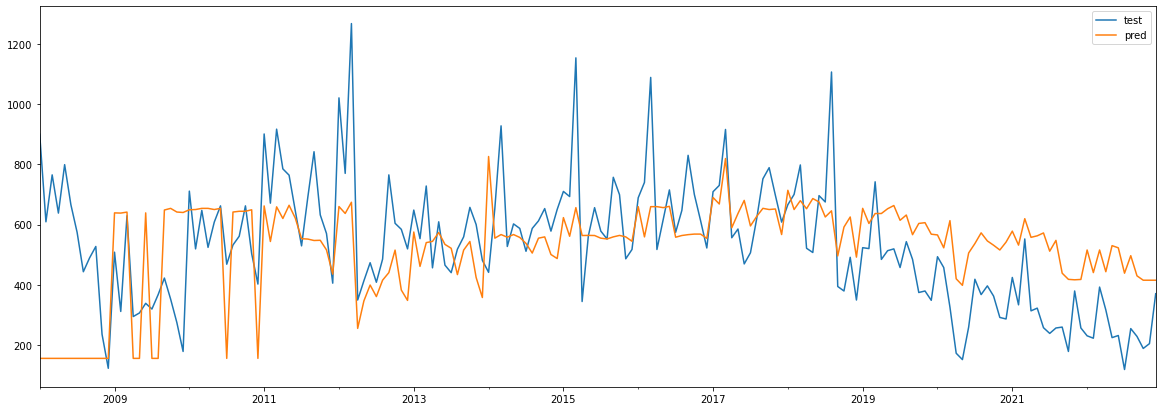

In [14]:
# Backtesting
from skforecast.model_selection import backtesting_forecaster

# Se separan para el backtest los últimos 3 años
n_backtesting = 12*15

metric, backtest_pred = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = df[dep_var],
                                    exog               = df_exo,
                                    initial_train_size = len(df) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    refit              = True,
                                    metric             = 'mean_squared_error',
                                    verbose            = True
                                 )

print(f"Error de backtest: {metric}")

fig, ax = plt.subplots(figsize=(20, 7))
df.loc[backtest_pred.index, dep_var].plot(ax=ax, label='test')
backtest_pred.plot(ax=ax, label='predicciones')
ax.legend();

#### Featrue Importance

In [15]:
# Feature importance
feature_importance = forecaster.get_feature_importance().sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
16,TIV,0.426488
11,lag_12,0.200858
0,lag_1,0.103544
15,Long_term_interest_rates,0.046142
2,lag_3,0.043024
3,lag_4,0.029884
17,Unemployment_rate,0.029877
4,lag_5,0.024309
12,Avg_Fuel_Price,0.016711
1,lag_2,0.013255


### LightGBM

In [16]:
# Import LightGBM Regressor
from lightgbm import LGBMRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
          
# Instantiate the regressor
model = LGBMRegressor()

# Create forecaster
forecaster = ForecasterAutoreg(
                regressor = LGBMRegressor(),
                lags      = 7
             )

# Train forecaster
forecaster.fit(y=train[dep_var], exog=train_exo)
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor() 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['Avg_Fuel_Price', 'CCI', 'CPI', 'Long_term_interest_rates', 'TIV', 'Unemployment_rate'] 
Training range: [Timestamp('2006-01-01 00:00:00'), Timestamp('2019-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0} 
Creation da

#### Baseline predictions

In [17]:
# Predict and score
model_name = model.__class__.__name__
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

LGBMRegressor Model Performance:
Mean Absolute Error: 162.20.
Mean Squared Error: 34614.37.
Root Mean Squared Error: 186.05.
R^2 Score = -2.62.
Mean Absolute Percentage Error: 64.40%.
Accuracy = 35.60%.


#### Hyperparameter Tuning

In [18]:
# Hyperparameter Grid search
from skforecast.model_selection import grid_search_forecaster

forecaster = ForecasterAutoreg(
                regressor = LGBMRegressor(random_state=42),
                lags      = 12 # Este valor será remplazado en el grid search
             )

lags_grid = [6,12]

# Set hyperparameters possibilities for model tuning
lgbm_n_estimators = [100, 500, 1000]
lgbm_max_depth = [4, 6, 8]
lgbm_num_leaves = [3, 5, 7]
lgbm_learning_rate = [0.01, 0.1, 0.3]
#lgbm_subsample = [0.3, 0.2, 0.1]

# Create the grid
param_grid = {'n_estimators': lgbm_n_estimators,
            'max_depth': lgbm_max_depth,
            'num_leaves': lgbm_num_leaves,
            'learning_rate': lgbm_learning_rate,
 #           'subsample': lgbm_learning_rate
           }

grid_results = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train[dep_var],
                        exog               = train_exo,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                    )

Number of models compared: 162.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:11<00:00, 35.85s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'num_leaves': 7}
  Backtesting metric: 20744.12999272142



In [19]:
# Grid Search Results
grid_results.head()

,lags,params,mean_squared_error,learning_rate,max_depth,n_estimators,num_leaves
104,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",20744.129993,0.01,8.0,500.0,7.0
95,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",20744.129993,0.01,6.0,500.0,7.0
103,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",20824.057234,0.01,8.0,500.0,5.0
85,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",20824.057234,0.01,4.0,500.0,5.0
94,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",20824.057234,0.01,6.0,500.0,5.0


In [20]:
# Predict and score
model_name = model.__class__.__name__ + ' Tuned'
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

LGBMRegressor Tuned Model Performance:
Mean Absolute Error: 160.70.
Mean Squared Error: 32737.73.
Root Mean Squared Error: 180.94.
R^2 Score = -2.42.
Mean Absolute Percentage Error: 65.33%.
Accuracy = 34.67%.


#### Backtesting

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 180
    Number of folds: 5
    Number of steps per fold: 36

Data partition in fold: 0
    Training:   2006-01-01 00:00:00 -- 2007-12-01 00:00:00  (n=24)
    Validation: 2008-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=36)
Data partition in fold: 1
    Training:   2006-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=60)
    Validation: 2011-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=36)
Data partition in fold: 2
    Training:   2006-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=96)
    Validation: 2014-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=36)
Data partition in fold: 3
    Training:   2006-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=132)
    Validation: 2017-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=36)
Data partition in fold: 4
    Training:   2006-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=168)
    Validation: 2020-01-01 00:00:00 

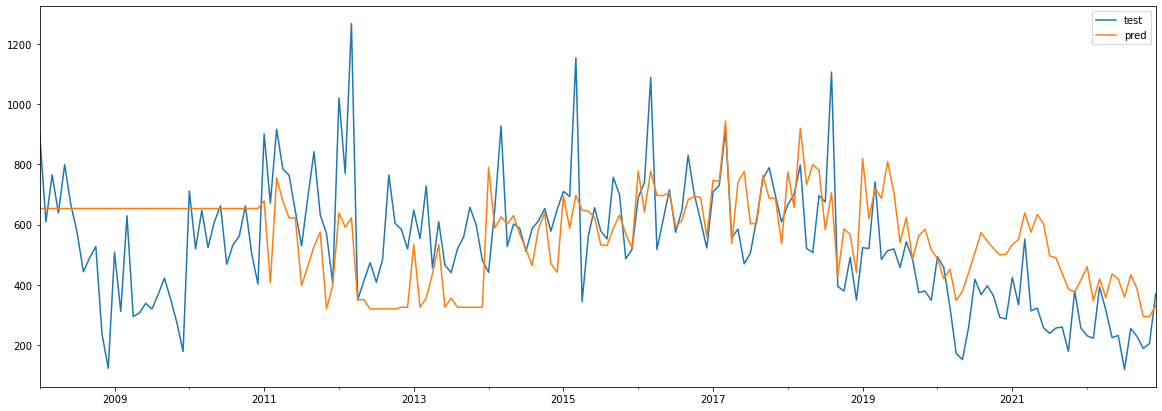

In [21]:
# Backtesting
from skforecast.model_selection import backtesting_forecaster

# Se separan para el backtest los últimos 3 años
n_backtesting = 12*15

metric, backtest_pred = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = df[dep_var],
                                    exog               = df_exo,
                                    initial_train_size = len(df) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    refit              = True,
                                    metric             = 'mean_squared_error',
                                    verbose            = True
                                 )

print(f"Error de backtest: {metric}")

fig, ax = plt.subplots(figsize=(20, 7))
df.loc[backtest_pred.index, dep_var].plot(ax=ax, label='test')
backtest_pred.plot(ax=ax, label='predicciones')
ax.legend();

#### Feature importance

In [22]:
# Feature importance
feature_importance = forecaster.get_feature_importance().sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
16,TIV,434
11,lag_12,306
17,Unemployment_rate,292
0,lag_1,289
2,lag_3,177
15,Long_term_interest_rates,166
13,CCI,163
14,CPI,149
6,lag_7,100
1,lag_2,73


### Extra Tree

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
          
# Instantiate the regressor
model = ExtraTreesRegressor()

# Create forecaster
forecaster = ForecasterAutoreg(
                regressor = ExtraTreesRegressor(),
                lags      = 12
             )

# Train forecaster
forecaster.fit(y=train[dep_var], exog=train_exo)
forecaster

ForecasterAutoreg 
Regressor: ExtraTreesRegressor() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['Avg_Fuel_Price', 'CCI', 'CPI', 'Long_term_interest_rates', 'TIV', 'Unemployment_rate'] 
Training range: [Timestamp('2006-01-01 00:00:00'), Timestamp('2019-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 
Creation date: 

#### Baseline Predictions

In [24]:
# Predict and score
model_name = model.__class__.__name__
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

ExtraTreesRegressor Model Performance:
Mean Absolute Error: 202.15.
Mean Squared Error: 47493.05.
Root Mean Squared Error: 217.93.
R^2 Score = -3.96.
Mean Absolute Percentage Error: 83.89%.
Accuracy = 16.11%.


#### Hyperparameter Tuning

In [25]:
regressor = ExtraTreesRegressor()
regressor.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [26]:
# Hyperparameter Grid search
from skforecast.model_selection import grid_search_forecaster

forecaster = ForecasterAutoreg(
                regressor = ExtraTreesRegressor(),
                lags      = 12 # Este valor será remplazado en el grid search
             )

lags_grid = [6,12]

# Set hyperparameters possibilities for model tuning
max_depth = [4, 6, 8]
min_samples_split = [3, 5, 7]
max_features = ['auto', 'sqrt', 'log2']


# Create the grid
param_grid = {
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'max_features': max_features
           }

grid_results = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train[dep_var],
                        exog               = train_exo,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                    )

Number of models compared: 54.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:47<00:00, 23.58s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 5}
  Backtesting metric: 21134.193818337



In [27]:
# Grid Search Results
grid_results.head()

,lags,params,mean_squared_error,max_depth,max_features,min_samples_split
49,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 8, 'max_features': 'sqrt', 'min_...",21134.193818,8,sqrt,5
36,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 6, 'max_features': 'auto', 'min_...",21246.304007,6,auto,3
40,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 6, 'max_features': 'sqrt', 'min_...",21526.964626,6,sqrt,5
27,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 4, 'max_features': 'auto', 'min_...",21587.157038,4,auto,3
38,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 6, 'max_features': 'auto', 'min_...",21606.790423,6,auto,7


In [28]:
# Predict and score
model_name = model.__class__.__name__ + ' Tuned'
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

ExtraTreesRegressor Tuned Model Performance:
Mean Absolute Error: 243.69.
Mean Squared Error: 67878.18.
Root Mean Squared Error: 260.53.
R^2 Score = -6.09.
Mean Absolute Percentage Error: 101.66%.
Accuracy = -1.66%.


#### Backtesting

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 180
    Number of folds: 5
    Number of steps per fold: 36

Data partition in fold: 0
    Training:   2006-01-01 00:00:00 -- 2007-12-01 00:00:00  (n=24)
    Validation: 2008-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=36)
Data partition in fold: 1
    Training:   2006-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=60)
    Validation: 2011-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=36)
Data partition in fold: 2
    Training:   2006-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=96)
    Validation: 2014-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=36)
Data partition in fold: 3
    Training:   2006-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=132)
    Validation: 2017-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=36)
Data partition in fold: 4
    Training:   2006-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=168)
    Validation: 2020-01-01 00:00:00 

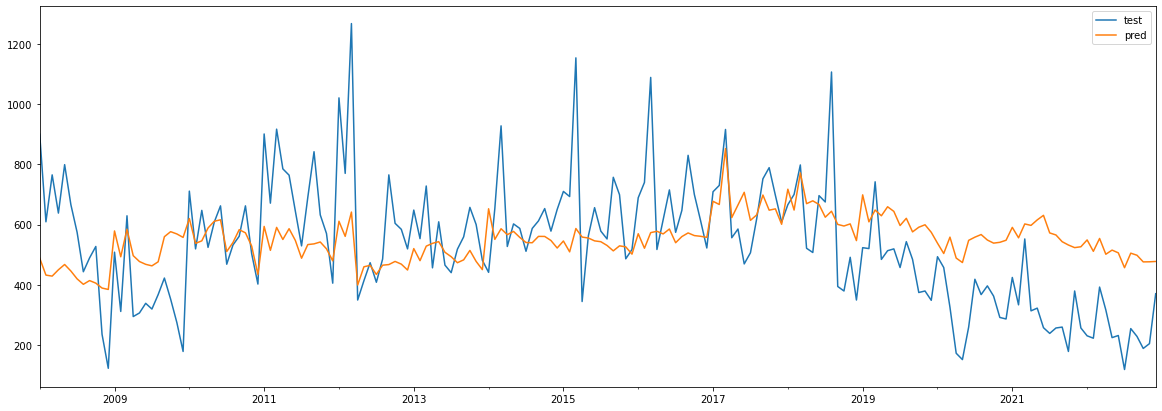

In [29]:
# Backtesting
from skforecast.model_selection import backtesting_forecaster

# Se separan para el backtest los últimos 3 años
n_backtesting = 12*15

metric, backtest_pred = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = df[dep_var],
                                    exog               = df_exo,
                                    initial_train_size = len(df) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    refit              = True,
                                    metric             = 'mean_squared_error',
                                    verbose            = True
                                 )

print(f"Error de backtest: {metric}")

fig, ax = plt.subplots(figsize=(20, 7))
df.loc[backtest_pred.index, dep_var].plot(ax=ax, label='test')
backtest_pred.plot(ax=ax, label='predicciones')
ax.legend()

#### Feature importance

In [30]:
# Feature importance
feature_importance = forecaster.get_feature_importance().sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
16,TIV,0.265660
11,lag_12,0.167556
0,lag_1,0.095378
12,Avg_Fuel_Price,0.049630
17,Unemployment_rate,0.039833
1,lag_2,0.038873
13,CCI,0.037111
3,lag_4,0.034083
15,Long_term_interest_rates,0.033236
14,CPI,0.032359


### XGBoost

In [31]:
# Import XGBRegressor
from xgboost import XGBRegressor 
from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Instantiate the regressor
model = XGBRegressor()

# Create forecaster
forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(),
                lags      = 7
             )

# Train forecaster
forecaster.fit(y=train[dep_var], exog=train_exo)
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['Avg_Fuel_Price', '

#### Baseline Predictions

In [32]:
# Predict and score
model_name = model.__class__.__name__
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

XGBRegressor Model Performance:
Mean Absolute Error: 134.84.
Mean Squared Error: 25138.61.
Root Mean Squared Error: 158.55.
R^2 Score = -1.63.
Mean Absolute Percentage Error: 58.05%.
Accuracy = 41.95%.


#### Hyperparameter Tuning

In [33]:
# Hyperparameter Grid search
from skforecast.model_selection import grid_search_forecaster

forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=42),
                lags      = 12 # Este valor será remplazado en el grid search
             )

lags_grid = [6,12]

# Set hyperparameters possibilities for model tuning
xgb_n_estimators = [50, 100, 500]
xgb_max_depth = [4, 6, 8]
xgb_min_child_weight = [1, 3, 5]
xgb_eta = [0.01, 0.1, 0.3]

# Create the grid
param_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'eta': xgb_eta
            }                   

grid_results = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train[dep_var],
                        exog               = train_exo,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                    )

Number of models compared: 162.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:26<00:00, 43.23s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'eta': 0.01, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 500}
  Backtesting metric: 19091.910657396806



In [34]:
# Grid Search Results
grid_results.head()

,lags,params,mean_squared_error,eta,max_depth,min_child_weight,n_estimators
104,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.01, 'max_depth': 8, 'min_child_weigh...",19091.910657,0.01,8.0,3.0,500.0
86,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.01, 'max_depth': 4, 'min_child_weigh...",19125.743784,0.01,4.0,3.0,500.0
129,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.1, 'max_depth': 8, 'min_child_weight...",19676.821168,0.10,8.0,3.0,50.0
120,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.1, 'max_depth': 6, 'min_child_weight...",19966.901670,0.10,6.0,3.0,50.0
125,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.1, 'max_depth': 6, 'min_child_weight...",20048.369035,0.10,6.0,5.0,500.0


In [35]:
# Predict and score
model_name = model.__class__.__name__ + ' Tuned'
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

XGBRegressor Tuned Model Performance:
Mean Absolute Error: 161.32.
Mean Squared Error: 32511.02.
Root Mean Squared Error: 180.31.
R^2 Score = -2.40.
Mean Absolute Percentage Error: 69.45%.
Accuracy = 30.55%.


#### Backtesting

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 180
    Number of folds: 5
    Number of steps per fold: 36

Data partition in fold: 0
    Training:   2006-01-01 00:00:00 -- 2007-12-01 00:00:00  (n=24)
    Validation: 2008-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=36)
Data partition in fold: 1
    Training:   2006-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=60)
    Validation: 2011-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=36)
Data partition in fold: 2
    Training:   2006-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=96)
    Validation: 2014-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=36)
Data partition in fold: 3
    Training:   2006-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=132)
    Validation: 2017-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=36)
Data partition in fold: 4
    Training:   2006-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=168)
    Validation: 2020-01-01 00:00:00 

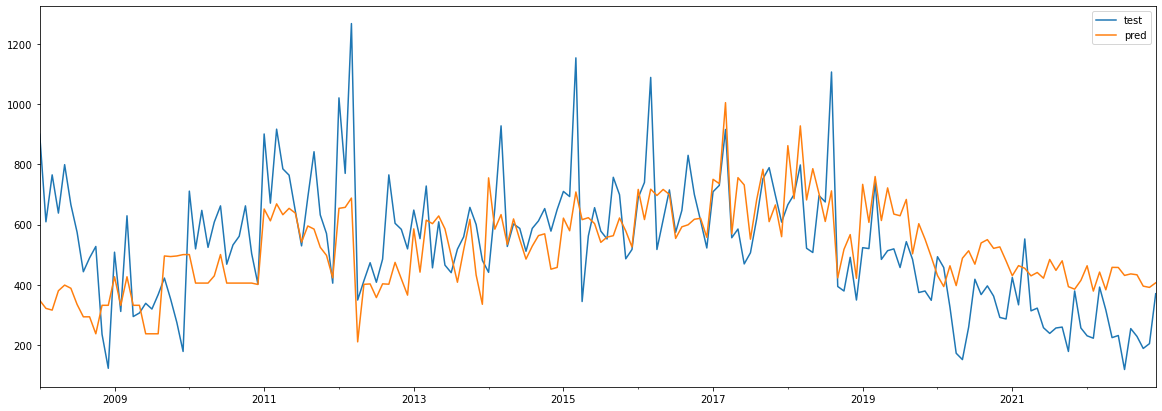

In [36]:
# Backtesting
from skforecast.model_selection import backtesting_forecaster
n_backtesting = 12*15 # Se separan para el backtest los últimos 9 años

metric, backtest_pred = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = df[dep_var],
                                    exog               = df_exo,
                                    initial_train_size = len(df) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    refit              = True,
                                    metric             = 'mean_squared_error',
                                    verbose            = True
                                 )

print(f"Error de backtest: {metric}")

fig, ax = plt.subplots(figsize=(20, 7))
df.loc[backtest_pred.index, dep_var].plot(ax=ax, label='test')
backtest_pred.plot(ax=ax, label='predicciones')
ax.legend();

#### Feature importance

In [37]:
# Feature importance
feature_importance = forecaster.get_feature_importance().sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
16,TIV,0.391680
15,Long_term_interest_rates,0.169334
11,lag_12,0.125756
0,lag_1,0.047957
17,Unemployment_rate,0.041834
3,lag_4,0.034047
4,lag_5,0.023566
2,lag_3,0.020926
6,lag_7,0.020253
13,CCI,0.019569


### Summary

In [38]:
metrics

,AdaBoostRegressor,AdaBoostRegressor Tuned,LGBMRegressor,LGBMRegressor Tuned,ExtraTreesRegressor,ExtraTreesRegressor Tuned,XGBRegressor,XGBRegressor Tuned
Mean Absolute Error,178.940812,201.795138,162.200517,160.696859,202.148333,243.689315,134.844025,161.321611
Mean Squared Error,38189.102842,46937.475147,34614.374728,32737.727499,47493.051378,67878.178063,25138.614813,32511.019688
Root Mean Squared Error,195.420324,216.650583,186.049388,180.935700,217.929005,260.534409,158.551616,180.308124
R^2,-2.988607,-3.902319,-2.615250,-2.419246,-3.960345,-6.089441,-1.625567,-2.395568
Mean Absolute Percentage Error,74.087450,82.939120,64.403859,65.328180,83.886855,101.656254,58.052002,69.450390
Accuracy,25.912550,17.060880,35.596141,34.671820,16.113145,-1.656254,41.947998,30.549610
